# Project 1



In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

Read and evaluate the following problem statement:
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0 = inactive user) based on Hooli data from Jan-Apr 2015.

1. What is the outcome:

Answer:Free-tier Customer will convert to a paying customer

2. What are the predictors/covariates:

Answer: Age, gender, location and profession as well as days since last log in, and ativity cose.

3. What timeframe is this data relevent for?

Answer: Jan-Apr 2015

4. What is the hypothesis:

That customer usage data as well as demographic data will help predict which customers will convert to paying customers.

## Let's get started with our dataset

#### 1. Create a data dictionary 


|Variable|Description|Type of Variable|
|------|--------------------------|--------------|
|Admit	|Admitted to the school or not. 1=Admitted 0 = not admitted	|Boolean |
|Gre	|Score of Gre test. 0-800 |Integer|
|GPA|GPA from previos school, 0-4.0| Float|
|Prestige| Prestige of last schol 0-4.0|Float|

Insert data in Data frame to start analysis

In [4]:
import pandas as pd
from pandas import DataFrame,Series
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

path='C:\\Anaconda2\\DAT-NYC-37\\projects\\unit-projects\\project-1\\assets\\admissions.csv'
frame=pd.read_csv(path, header=0, index_col=False, parse_dates=False)
frame.head()

,admit,gre,gpa,prestige
0,0,380.0,3.61,3.0
1,1,660.0,3.67,3.0
2,1,800.0,4.00,1.0
3,1,640.0,3.19,4.0
4,0,520.0,2.93,4.0


In [5]:
#Create Intervals to make it easier to analyse how GPA factors on admission decision
group_names=['F','D', 'C', 'B', 'A', 'A+']
bins=[0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0]
frame['grade_range']=pd.cut(frame['gpa'], bins, labels=group_names)

#create a grouped by table to easily pull out records of students who were admitted
admitted=np.where(frame['admit'] > 0, 'Yes', 'no')
by_gpa=frame.groupby(['prestige','grade_range', admitted])
counts_admit_gpa=by_gpa.size().unstack().fillna(0)

#Locate Yes and No per prestige group:
Yes_1=counts_admit_gpa.loc[1.0, ['Yes']].sum()
Yes_2=counts_admit_gpa.loc[2.0, ['Yes']].sum()
Yes_3=counts_admit_gpa.loc[3.0, ['Yes']].sum()
Yes_4=counts_admit_gpa.loc[4.0, ['Yes']].sum()
No_1=counts_admit_gpa.loc[1.0, ['no']].sum()
No_2=counts_admit_gpa.loc[2.0, ['no']].sum()
No_3=counts_admit_gpa.loc[3.0, ['no']].sum()
No_4=counts_admit_gpa.loc[4.0, ['no']].sum()

#Create Percentage function:
def add_percent(a, b):
	total_admit=a + b
	percent_of_yes=a/total_admit
	convert=percent_of_yes * 100
	return convert

print "Percent of Yes if Prestige 1:", add_percent(Yes_1[0], No_1[0]), "%"
print "Percent of Yes if Prestige 2:", add_percent(Yes_2[0], No_2[0]), "%"
print "Percent of Yes if Prestige 3:", add_percent(Yes_3[0], No_3[0]), "%"
print "Percent of Yes if Prestige 4:", add_percent(Yes_4[0], No_4[0]), "%"

Percent of Yes if Prestige 1: 54.0983606557 %
Percent of Yes if Prestige 2: 35.5704697987 %
Percent of Yes if Prestige 3: 23.1404958678 %
Percent of Yes if Prestige 4: 17.9104477612 %


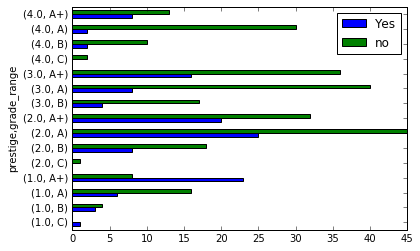

In [6]:
counts_admit_gpa.plot(kind='barh', rot=0)

#### 2. What is the outcome?

Answer: Admit variable, Yes/No

#### 3. What are the predictors/covariates? 

Answer: Predictors is gpa and gre scores. Covariates which can being used to make a big prediction is Prestige

#### 4. What timeframe is this data relevant for?

Answer: No time frame provided.

#### 4. What is the hypothesis?

Answer: That gpa, gre and prestige of school will allow us to figure out the likely hood of someone getting admitted to a school.

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

Answer: To find relations between gpa, gre, prestige and the likley hood of getting accepted

#### 2a. What are the assumptions of the distribution of data? 

Answer: That higher gpa, gre and prestige of shchool will increase your changes of getting admitted.

#### 2b. How will determine the distribution of your data? 

Answer: Grouping and sectioning data alone to analyze in more detail.

#### 3a. How might outliers impact your analysis? 

Answer: High grades/gre scores could have little impact on whether you get admitted or not with out taking into consideration prestige of school. Also, a student with low gre scores and a low gpa could of got admitted.

#### 3b. How will you test for outliers? 

Answer: The following test shows a break down of Prestige per GRE score per interval of grade. This shows that GRE score's show little to no help in figuring out whether this standardized test increase the likely hood of getting accepted.

In [7]:
by_gre=frame.groupby(['prestige','gre', 'grade_range', admitted])
counts_admit_gre=by_gre.size().unstack().fillna(0)
print counts_admit_gre.head()

                            Yes   no
prestige gre   grade_range          
1.0      340.0 B            0.0  1.0
         360.0 A            0.0  1.0
         420.0 B            0.0  1.0
               A            0.0  1.0
         440.0 A            0.0  1.0


Example is the following:
600.0 A            0.0  1.0
      A+           3.0  0.0
      
Above student got a 600 and an A+ and got accepted, however, the following student got a 660 and did not get accepted:

 660.0 A+          0.0  1.0

#### 4a. What is collinearity? 

Answer: A phenomenon in which two or more predictor variables in a multiple regression model are highly correlated, meaning that one can be linearly predicted from the others with a substantial degree of accuracy. 

#### 4b. How will you test for collinearity? 

Answer: Using this case as a model, being at a Presige 1 school while getting above a 3.5 increases your liklyhood of getting admitted. Just of these two variable alone you can see a 74% chance of getting admitted. 

In [25]:
print counts_admit_gpa

                       Yes    no
prestige grade_range            
1.0      C             1.0   0.0
         B             3.0   4.0
         A             6.0  16.0
         A+           23.0   8.0
2.0      C             0.0   1.0
         B             8.0  18.0
         A            25.0  45.0
         A+           20.0  32.0
3.0      B             4.0  17.0
         A             8.0  40.0
         A+           16.0  36.0
4.0      C             0.0   2.0
         B             2.0  10.0
         A             2.0  30.0
         A+            8.0  13.0


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis one year from now. 

Answer: What you should explore is what variables, if any increase the perctage of you being accepted to the school. In order to do this, a correlation should be created between gpa score, prestige of previous school and gre score. However, you should also test to see if outliners exist that would otherwise give a false idea of impacting the decision of being accepted to the school. In this example, GRE scores in general seemed to have little to no impact on decision.

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model